In [ ]:
import torch
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np



Device

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Load pre-trained model

In [ ]:
model = models.resnet18(pretrained=True).to(device)
model.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 210MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Prepare dataset (subset of CIFAR-10 for demonstration)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

test_dataset = datasets.CIFAR10(root='~/.keras/datasets', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

100%|██████████| 170M/170M [00:14<00:00, 12.1MB/s]


 Define loss function

In [ ]:
criterion = nn.CrossEntropyLoss()

Evaluate model on dataset

In [ ]:
all_losses = []
all_accuracies = []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        outputs = model(imgs)  # [batch, 1000]

        # Compute loss (for demonstration; note labels are CIFAR-10, model trained on ImageNet)
        # So loss values are arbitrary, but can be visualized
        labels_expanded = torch.randint(0, 1000, labels.shape).to(device)  # simulate compatible labels
        loss = criterion(outputs, labels_expanded)
        all_losses.append(loss.item())

        # Compute accuracy (simulate top-1 accuracy for visualization)
        preds = outputs.argmax(dim=1)
        acc = (preds == labels_expanded).float().mean().item()
        all_accuracies.append(acc)

Plot Loss and Accuracy

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")

Total parameters: 11689512
Trainable parameters: 11689512


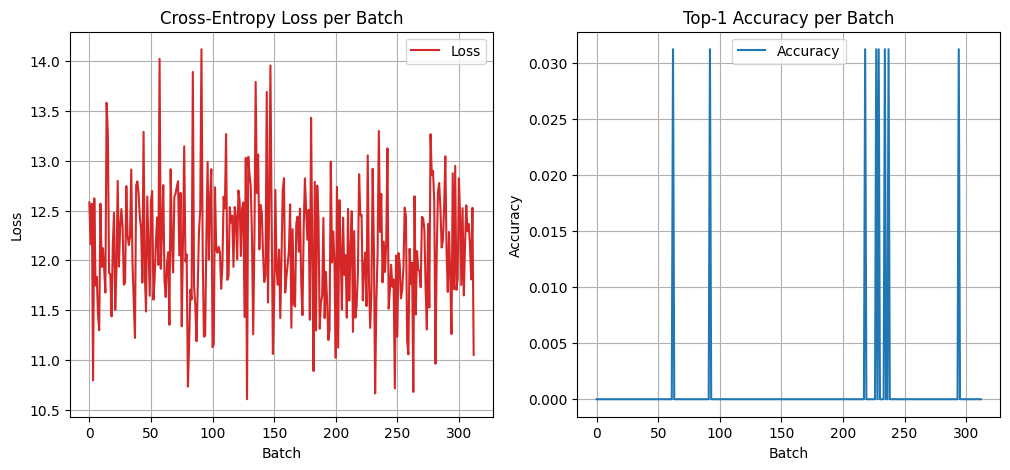

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(all_losses, label="Loss", color='tab:red')
plt.title("Cross-Entropy Loss per Batch")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(all_accuracies, label="Accuracy", color='tab:blue')
plt.title("Top-1 Accuracy per Batch")
plt.xlabel("Batch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.show()
